# Amplitude Analysis

## Attempt 1 : USing Librosa

In [85]:
import librosa
import IPython.display as ipd
ipd.Audio('../Audio.mp3')

In [6]:
data, sampling_rate = librosa.load('./Audio1.mp3')

Populating the interactive namespace from numpy and matplotlib


<function librosa.core.spectrum.power_to_db>

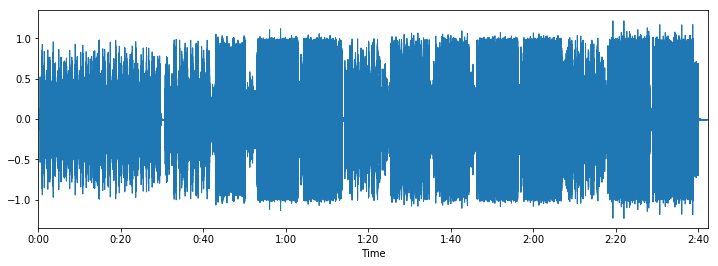

In [10]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 
import numpy
import matplotlib
%matplotlib inline
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

librosa.core.logamplitude


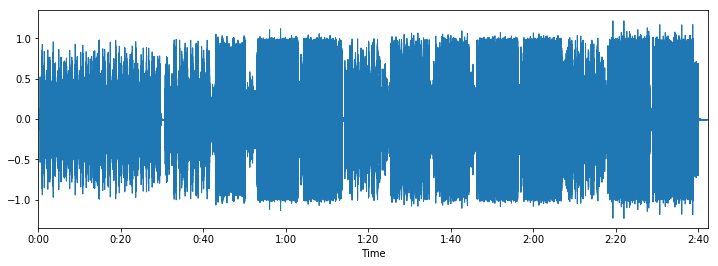

In [9]:
data, sampling_rate = librosa.load('./Audio1.mp3')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [12]:
y, sr = librosa.load('./Audio1.mp3')
S = np.abs(librosa.stft(y))
librosa.logamplitude(S**2)

array([[-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882],
       [-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882],
       [-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882],
       ...,
       [-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882],
       [-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882],
       [-28.186882, -28.186882, -28.186882, ..., -28.186882, -28.186882,
        -28.186882]], dtype=float32)

In [13]:
librosa.logamplitude(S**2, ref_power=np.max)

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [16]:
librosa.logamplitude(S**2, ref_power=np.median)

array([[-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206],
       [-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206],
       [-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206],
       ...,
       [-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206],
       [-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206],
       [-23.86206, -23.86206, -23.86206, ..., -23.86206, -23.86206,
        -23.86206]], dtype=float32)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


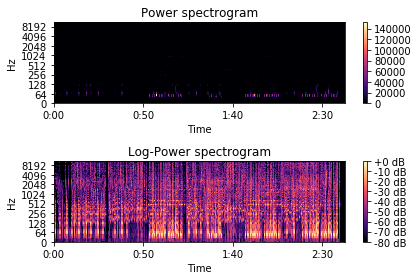

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(S**2, sr=sr, y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.logamplitude(S**2, ref_power=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Power spectrogram')
plt.tight_layout()

## Attempt 2 : Using Soundfile

In [86]:
import soundfile as sf
data, samplerate = sf.read('/Users/home/Downloads/a1.wav')
type(samplerate)
samplerate

48000

#### Soundfile takes in only wav file as input

### Using pydub to convert audio files to wav format

In [58]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("a1.mp3")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Audio1.wav", format="wav")

<open file '/Users/home/Machine_Learning/Hack_VSIT/Audio1.wav', mode 'wb+' at 0x119831f60>

In [57]:
data, samplerate = sf.read('./Audio1.wav')
type(samplerate)
samplerate

44100

In [51]:
data

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-3.05175781e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

#### Paasta's Voice

In [62]:
from pydub import AudioSegment
sound = AudioSegment.from_file("mohit.mp3")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Mohit.wav", format="wav")
data, samplerate = sf.read('./Mohit.wav')
type(samplerate)
samplerate

44100

#### Mohit's Voice

In [61]:
from pydub import AudioSegment
sound = AudioSegment.from_file("Paasta.mp3")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Paasta.wav", format="wav")
data, samplerate = sf.read('./Paasta.wav')
type(samplerate)
samplerate

44100

## Screw the above methods 

# Attempt 3 : Using pylab

In [63]:
from pylab import*
from scipy.io import wavfile

## Paasta's Voice

In [93]:
from pydub import AudioSegment
sound = AudioSegment.from_file("Paasta.ogg")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Paasta.wav", format="wav")
sampFreq, snd = wavfile.read('Paasta.wav')
snd = snd / (2.**15)
rms_val = sqrt(mean(snd**2))
rms_val

0.007739942659388628

## Mohit's Voice

In [92]:
from pydub import AudioSegment
sound = AudioSegment.from_file("Mohit.ogg")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Mothi.wav", format="wav")
snd = snd / (2.**15)
rms_val = sqrt(mean(snd**2))
rms_val

1.144824672184157e-06

## Mansi's Voice

In [88]:
from pydub import AudioSegment
sound = AudioSegment.from_file("Mansi.ogg")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Mansi.wav", format="wav")
sampFreq, snd = wavfile.read('Mansi.wav')
snd = snd / (2.**15)
rms_val = sqrt(mean(snd**2))
rms_val

0.018494679953633058

## Arpit's Voice

In [89]:
from pydub import AudioSegment
sound = AudioSegment.from_file("Arpit.ogg")
sound.export("/Users/home/Machine_Learning/Hack_VSIT/Arpit.wav", format="wav")
sampFreq, snd = wavfile.read('Arpit.wav')
snd = snd / (2.**15)
rms_val = sqrt(mean(snd**2))
rms_val

0.037513614858130456